In [1]:
import pandas as pd
import os
import warnings
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import covid19pandas as cod

In [2]:
l = cod.get_data_jhu()

These data were obtained from Johns Hopkins University (https://github.com/CSSEGISandData/COVID-19).


In [3]:
s = cod.select_top_x_regions(l, "Combined_Key", "cases", 10)
s.tail()

,date,Combined_Key,cases
975,2020-04-28,Italy,201505
976,2020-04-28,Spain,232128
977,2020-04-28,Turkey,114653
978,2020-04-28,US,1012582
979,2020-04-28,United Kingdom,161145


In [4]:
m = cod.calc_x_day_rolling_mean(s, "cases", 5)
m.tail()

,date,Combined_Key,cases,cases_mean
975,2020-04-28,Italy,201505,199531.333333
976,2020-04-28,Spain,232128,229393.000000
977,2020-04-28,Turkey,114653,112348.000000
978,2020-04-28,US,1012582,988854.666667
979,2020-04-28,United Kingdom,161145,157044.666667


In [5]:
d = cod.calc_daily_change(m, ["cases", "cases_mean"])
d.tail()

,date,Combined_Key,cases,cases_mean,daily_cases,daily_cases_mean
975,2020-04-28,Italy,201505,199531.333333,2091,1045.083333
976,2020-04-28,Spain,232128,229393.000000,2706,1408.500000
977,2020-04-28,Turkey,114653,112348.000000,2392,1143.750000
978,2020-04-28,US,1012582,988854.666667,24385,12675.166667
979,2020-04-28,United Kingdom,161145,157044.666667,3996,2166.916667


In [7]:
dus = d[d["Combined_Key"] == "US"]

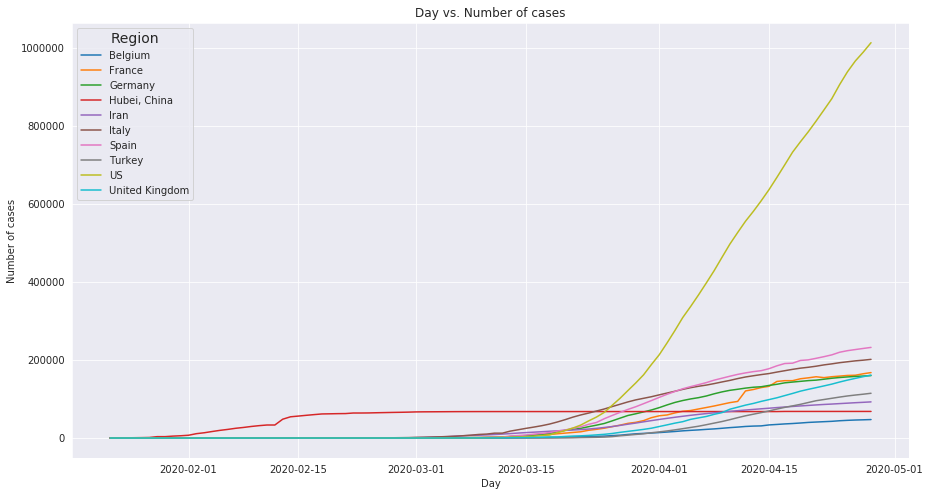

In [8]:
fig, ax = cod.line_plot(d, "date", "cases", "Combined_Key", "Day", "Number of cases", "Day vs. Number of cases", "Region")

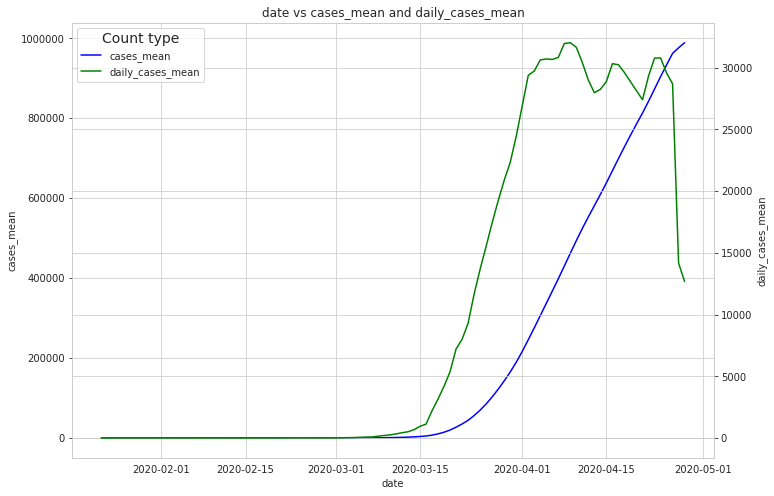

In [13]:
fig, axs = cod.line_plot_two_y(dus, "date", "cases_mean", "daily_cases_mean", legend_title="Count type", seaborn_style="whitegrid", dimensions=(11.5, 8))

In [9]:
help(cod.line_plot_two_y)

Help on function line_plot_two_y in module covid19pandas.plotters:

line_plot_two_y(data, x_col, y1_col, y2_col, x_lab=None, y1_lab=None, y2_lab=None, title=None, legend_title=None, y_logscale=False, dimensions=(15, 8), seaborn_style='darkgrid', legend_loc='best')
    # Line plot with two lines and scaled axes



In [105]:
type(axs[1])

matplotlib.axes._subplots.AxesSubplot

In [21]:
type(fig)

matplotlib.figure.Figure

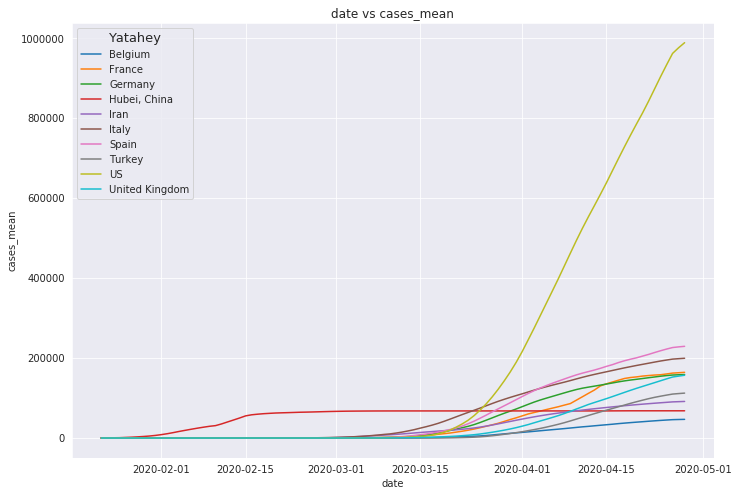

In [15]:
fig, ax = line_plot(d, "date", "cases_mean", "Combined_Key", dimensions=(11.5, 8))

In [14]:
# Line plot with possible multiple lines
def line_plot(data, x_col, y_col, group_col, y_logscale=False, dimensions=(15, 8), seaborn_style="darkgrid"):

    # Set plot colors and dimensions
    sns.set_style(seaborn_style)
    fig, ax = plt.subplots(figsize=dimensions)

    # Create the plot
    sns.lineplot(x=x_col,
                y=y_col,
                data=data,
                hue=group_col,
                ax=ax)

    # Set y log scale if desired
    if y_logscale:
        ax.set(yscale="log", ylabel=y_col + " (log scale)") 
        
    # Give it a default title
    title = f"{x_col} vs {y_col}"
    if y_logscale:
        title = title + " (log scale)"
    ax.set(title=title)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], title="Yatahey", title_fontsize="13")
    
    return fig, ax

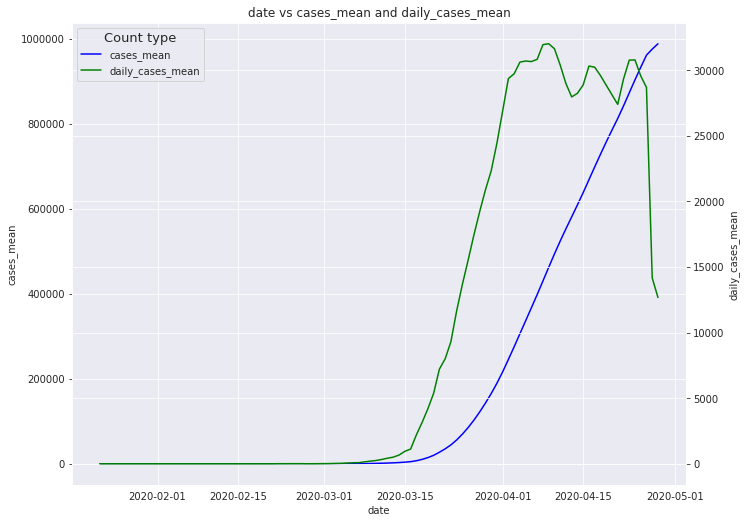

In [20]:
fig, axs = line_plot_two_y(dus, "date", "cases_mean", "daily_cases_mean", legend_title="Count type", dimensions=(11, 8.5))

In [19]:
# Line plot with two lines and scaled axes
def line_plot_two_y(data, x_col, y1_col, y2_col, y_logscale=False, dimensions=(15, 8), seaborn_style="darkgrid", legend_loc="best", legend_title=None):

    # Set plot colors and dimensions
    sns.set_style(seaborn_style)
    fig, ax1 = plt.subplots(figsize=dimensions)

    # Create the plot
    sns.lineplot(x=x_col,
                y=y1_col,
                data=data,
                ax=ax1,
                color="b")
    
    ax2 = ax1.twinx()
    sns.lineplot(x=x_col,
                y=y2_col,
                data=data,
                ax=ax2,
                color="g")
    
    # Set y log scale if desired
    if y_logscale:
        ax1.set(yscale="log", ylabel=y1_col + " (log scale)")
        ax2.set(yscale="log", ylabel=y1_col + " (log scale)")
        
    # Give it a default title
    title = f"{x_col} vs {y1_col} and {y2_col}"
    if y_logscale:
        title = title + " (log scale)"
    ax1.set(title=title)
    
    # Create the legend
    lines = ax1.get_lines() + ax2.get_lines()
    labels = [y1_col, y2_col]
    leg = ax2.legend(lines, labels, loc=legend_loc, title_fontsize="13")
    
    if legend_title is not None:
         leg.set_title(legend_title)

    return fig, (ax1, ax2)